In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import math
eps = np.finfo(float).eps
from numpy import log2 as log

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 
           'Sunny', 'Sunny', 'Sunny', 
           'Overcast','Rainy', 'Rainy', 
           'Sunny', 'Rainy','Overcast', 
           'Overcast', 'Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 
               'Mild', 'Cool', 'Cool', 
               'Cool', 'Mild', 'Cool', 
               'Mild', 'Mild', 'Mild', 
               'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 
            'High', 'Normal', 'Normal', 
            'Normal','High', 'Normal', 
            'Normal', 'Normal', 'High', 
            'Normal', 'High']

Wind = ['False', 'True', 'False', 
        'False', 'False', 'True', 
        'True', 'False', 'False', 
        'False', 'True', 'True', 
        'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 
        'Yes', 'Yes', 'No', 
        'Yes', 'No', 'Yes', 
        'Yes', 'Yes', 'Yes', 
        'Yes', 'No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temperature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temperature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
data = pd.DataFrame({'Weather': Outlook_encoded, 
                     'Temperature': Temperature_encoded,
                     'Humidity' : Humidity_encoded,
                     'Wind' : Wind_encoded})
data

,Weather,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [ ]:
# Step 5: Train ’Create and Train DecisionTreeClassifier’
#Create a Decision Tree Classifier (using Entropy)

X_train, X_test, Y_train, Y_test = train_test_split(data, Play_encoded, test_size = .20, random_state = 0)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy.fit(data, Play_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
# Step 6: Predict Output for new data
y_prediction = clf_entropy.predict(X_test)

print(X_test)
print("Predicted Values: ", y_prediction)

   Weather  Temperature  Humidity  Wind
8        1            0         1     0
6        0            0         1     1
4        2            0         1     0
Predicted Values:  [1 1 1]


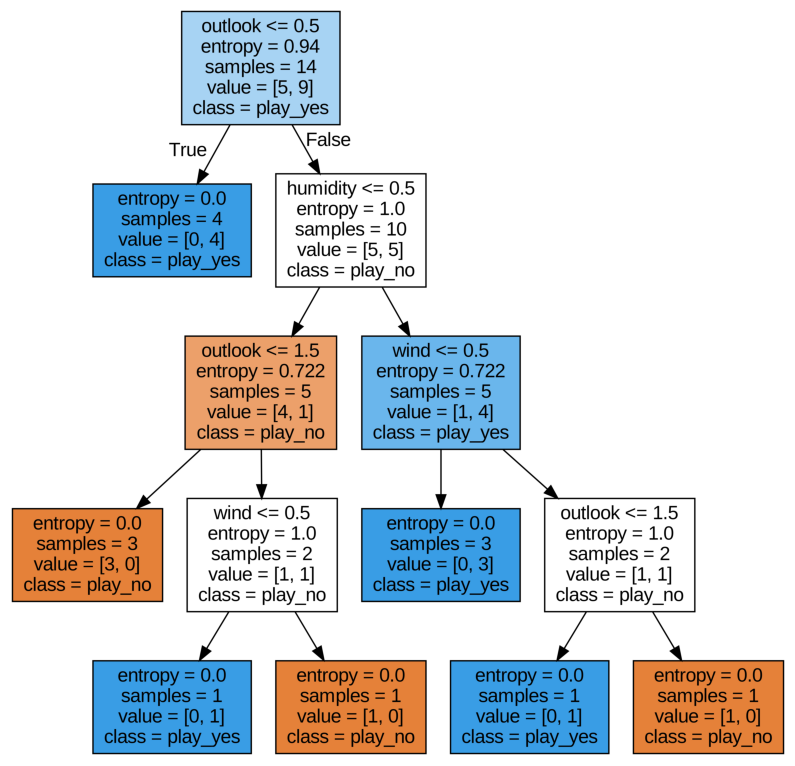

In [ ]:
export_graphviz(clf_entropy,out_file='tree_entropy.dot', feature_names=['outlook','temperature','humidity','wind'], class_names=['play_no','play_yes'], filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();